<a href="https://colab.research.google.com/github/ishancoderr/3D_modeling/blob/main/Final_programme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [283]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read csv data file in athletes

In [284]:
athletes_data=pd.read_csv("/content/sample_data/new-ath.csv")

In [285]:
athletes_data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30,187,76,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",1
1,86,Jos Manuel Abascal Gmez,M,22,182,67,Spain,ESP,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 1,500 metres",0
2,86,Jos Manuel Abascal Gmez,M,26,182,67,Spain,ESP,1984 Summer,1984,Summer,Los Angeles,Athletics,"Athletics Men's 1,500 metres",1
3,169,Raida Abdallah Bader,F,19,158,49,Jordan,JOR,1984 Summer,1984,Summer,Los Angeles,Athletics,"Athletics Women's 3,000 metres",0
4,234,Abdalla Abdelgadir El-Sheikh,M,21,170,58,Sudan,SUD,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Men's 1,500 metres",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,6592,Gerald Ian d'Acres Backhouse,M,23,165,57,Australia,AUS,1936 Summer,1936,Summer,Berlin,Athletics,"Athletics Men's 1,500 metres",1
94,6617,"Charles James Bacon, Jr.",M,19,183,77,United States,USA,1904 Summer,1904,Summer,St. Louis,Athletics,"Athletics Men's 1,500 metres",0
95,6652,"Andrew James ""Andy"" Baddeley",M,26,186,70,Great Britain,GBR,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Men's 1,500 metres",0
96,6652,"Andrew James ""Andy"" Baddeley",M,30,186,70,Great Britain,GBR,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",1


In [286]:
column_names= athletes_data.columns.values.tolist()
print(column_names)

['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']


In [287]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [288]:
#Create label encoder

labelencode=LabelEncoder()
athletes_data['Team_l']=labelencode.fit_transform(athletes_data['Team'])
labelencode=LabelEncoder()
athletes_data['sport_l']=labelencode.fit_transform(athletes_data['Sport'])
labelencode=LabelEncoder()
athletes_data['sex_l']=labelencode.fit_transform(athletes_data['Sex'])
labelencode=LabelEncoder()
athletes_data['Event_l']=labelencode.fit_transform(athletes_data['Event'])

In [289]:
athletes_data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Team_l,sport_l,sex_l,Event_l
0,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30,187,76,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",1,21,0,1,0
1,86,Jos Manuel Abascal Gmez,M,22,182,67,Spain,ESP,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 1,500 metres",0,44,0,1,0
2,86,Jos Manuel Abascal Gmez,M,26,182,67,Spain,ESP,1984 Summer,1984,Summer,Los Angeles,Athletics,"Athletics Men's 1,500 metres",1,44,0,1,0
3,169,Raida Abdallah Bader,F,19,158,49,Jordan,JOR,1984 Summer,1984,Summer,Los Angeles,Athletics,"Athletics Women's 3,000 metres",0,26,0,0,1
4,234,Abdalla Abdelgadir El-Sheikh,M,21,170,58,Sudan,SUD,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Men's 1,500 metres",1,45,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,6592,Gerald Ian d'Acres Backhouse,M,23,165,57,Australia,AUS,1936 Summer,1936,Summer,Berlin,Athletics,"Athletics Men's 1,500 metres",1,3,0,1,0
94,6617,"Charles James Bacon, Jr.",M,19,183,77,United States,USA,1904 Summer,1904,Summer,St. Louis,Athletics,"Athletics Men's 1,500 metres",0,52,0,1,0
95,6652,"Andrew James ""Andy"" Baddeley",M,26,186,70,Great Britain,GBR,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Men's 1,500 metres",0,23,0,1,0
96,6652,"Andrew James ""Andy"" Baddeley",M,30,186,70,Great Britain,GBR,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",1,23,0,1,0


In [290]:
new_athletes_data= athletes_data[['Team_l','Event_l','Age',	'sport_l'	,'sex_l','Height'	,'Weight','Medal']]

In [291]:
new_athletes_data

,Team_l,Event_l,Age,sport_l,sex_l,Height,Weight,Medal
0,21,0,30,0,1,187,76,1
1,44,0,22,0,1,182,67,0
2,44,0,26,0,1,182,67,1
3,26,1,19,0,0,158,49,0
4,45,0,21,0,1,170,58,1
...,...,...,...,...,...,...,...,...
93,3,0,23,0,1,165,57,1
94,52,0,19,0,1,183,77,0
95,23,0,26,0,1,186,70,0
96,23,0,30,0,1,186,70,1


# splitting the dataset into Test set and Training set

In [292]:
x=new_athletes_data.iloc[:,:-1].values 
y=new_athletes_data.iloc[:,-1].values

In [293]:
print(x)
print(y)

[[ 21   0  30   0   1 187  76]
 [ 44   0  22   0   1 182  67]
 [ 44   0  26   0   1 182  67]
 [ 26   1  19   0   0 158  49]
 [ 45   0  21   0   1 170  58]
 [ 11   3  21   1   0 173  59]
 [ 46   0  27   0   1 181  78]
 [ 43   2  22   1   1 190  78]
 [ 42   0  26   0   1 175  61]
 [ 35   2  15   1   1 177  64]
 [ 36   2  14   1   1 181  77]
 [ 49   0  19   0   1 168  55]
 [ 49   0  23   0   1 168  55]
 [ 15   2  20   1   1 187  87]
 [  3   3  20   1   0 178  72]
 [ 16   0  21   0   1 180  47]
 [ 42   0  27   0   1 178  75]
 [ 42   0  21   0   1 180  68]
 [ 42   0  26   0   1 180  68]
 [ 52   3  23   1   0 173  61]
 [ 23   3  21   1   0 165  53]
 [ 17   0  28   0   1 182  72]
 [ 27   2  18   1   1 168  65]
 [  0   0  26   0   1 172  65]
 [  0   0  30   0   1 172  65]
 [ 39   2  21   1   1 184  68]
 [ 23   2  21   1   1 190  82]
 [ 18   2  19   1   1 188  80]
 [ 40   0  27   0   1 160  59]
 [ 26   0  24   0   1 178  70]
 [ 53   0  18   0   1 175  65]
 [ 36   0  20   0   1 179  55]
 [ 51   

In [294]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=0)

In [295]:
print(x_train)
print(y_train)

[[  6   2  17   1   1 180  84]
 [  2   0  24   0   1 173  67]
 [ 26   1  19   0   0 158  49]
 [ 21   0  25   0   1 183  65]
 [ 47   0  26   0   1 183  70]
 [ 50   3  18   1   0 174  58]
 [ 46   0  27   0   1 181  78]
 [ 12   3  19   1   0 164  59]
 [ 24   3  20   1   0 172  56]
 [ 23   2  23   1   1 185  81]
 [ 29   1  28   0   0 165  50]
 [ 52   3  19   1   0 170  66]
 [  0   0  24   0   1 181  65]
 [  3   0  23   0   1 165  57]
 [ 43   2  20   1   1 178  65]
 [ 18   2  19   1   1 188  80]
 [ 42   0  26   0   1 180  68]
 [ 38   3  17   1   0 168  55]
 [ 13   2  14   1   1 173  68]
 [ 23   3  16   1   0 167  61]
 [ 44   0  22   0   1 182  67]
 [ 29   0  28   0   1 175  58]
 [  3   2  23   1   1 185  74]
 [ 30   0  23   0   1 180  65]
 [ 45   0  21   0   1 170  58]
 [ 16   0  21   0   1 180  47]
 [ 42   0  21   0   1 180  68]
 [ 36   0  19   0   1 170  60]
 [  5   0  19   0   1 170  61]
 [ 11   3  21   1   0 173  59]
 [ 21   0  29   0   1 183  65]
 [ 19   0  24   0   1 172  65]
 [ 21   

In [296]:
print(x_test)
print(y_test)

[[ 23   2  21   1   1 190  82]
 [ 48   3  24   1   0 180  68]
 [ 44   0  26   0   1 182  67]
 [  8   0  20   0   1 163  52]
 [  3   2  20   1   1 187  74]
 [ 33   1  22   0   0 153  53]
 [ 42   0  27   0   1 178  75]
 [ 52   3  15   1   0 170  66]
 [ 41   0  22   0   1 173  60]
 [ 25   0  28   0   1 183  70]
 [ 21   2  17   1   1 183  79]
 [ 29   0  21   0   1 176  58]
 [ 34   2  21   1   1 193  64]
 [ 15   2  20   1   1 187  87]
 [ 43   2  22   1   1 190  78]
 [ 53   0  18   0   1 175  65]
 [ 27   2  18   1   1 168  65]
 [  0   0  30   0   1 172  65]
 [ 40   0  23   0   1 171  59]
 [ 42   0  26   0   1 175  61]]
[0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1]


# Feature Scalling

In [297]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [298]:
print(X_train)
print(X_test)

[[-1.37193246  0.90875888 -1.45203347  1.33630621  0.50800051  0.44963835
   2.12912855]
 [-1.62210366 -0.77893618  0.42666386 -0.74833148  0.50800051 -0.48383138
   0.1940878 ]
 [-0.12107645  0.06491135 -0.91526281 -0.74833148 -1.96850197 -2.48412365
  -1.85477888]
 [-0.43379045 -0.77893618  0.6950492  -0.74833148  0.50800051  0.8496968
  -0.03356406]
 [ 1.19232237 -0.77893618  0.96343453 -0.74833148  0.50800051  0.8496968
   0.53556558]
 [ 1.37995077  1.75260641 -1.18364814  1.33630621 -1.96850197 -0.35047856
  -0.83034554]
 [ 1.12977957 -0.77893618  1.23181987 -0.74833148  0.50800051  0.58299117
   1.44617299]
 [-0.99667566  1.75260641 -0.91526281  1.33630621 -1.96850197 -1.68400674
  -0.71651961]
 [-0.24616205  1.75260641 -0.64687747  1.33630621 -1.96850197 -0.6171842
  -1.05799739]
 [-0.30870485  0.90875888  0.15827853  1.33630621  0.50800051  1.11640244
   1.78765077]
 [ 0.06655195  0.06491135  1.5002052  -0.74833148 -1.96850197 -1.55065392
  -1.74095295]
 [ 1.50503637  1.7526064

# Train Logistic Regression model on Training set

In [299]:
from sklearn.linear_model import LogisticRegression
Classifier=LogisticRegression(random_state=0)
Classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# predicting new result

In [300]:
print(Classifier.predict(sc.transform([[137,0,26,0,1,182,67.0]])))

[1]


# Predicting the Test set result

In [301]:
y_pred = Classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


# Making the Confusion Matrix

In [302]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[9 1]
 [1 9]]


0.9

Text(24.0, 0.5, 'Truth or Actual value')

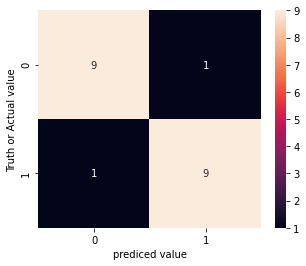

In [303]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize=(5,4))
sn.heatmap(cm,annot=True)
plt.xlabel("prediced value")
plt.ylabel("Truth or Actual value")


In [304]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = Classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 83.39 %
Standard Deviation: 5.54 %


please enter the how many :20
[1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1]
IN this sample get the medal probabity:
65.0
[131, 2, 36, 1, 1, 169, 88, 37, 0, 34, 0, 1, 161, 100, 78, 1, 34, 0, 0, 184, 66, 150, 3, 45, 0, 1, 171, 58, 121, 1, 34, 1, 1, 170, 55, 95, 3, 47, 0, 1, 191, 76, 87, 0, 33, 1, 1, 192, 93, 151, 2, 41, 0, 1, 173, 76, 61, 0, 42, 0, 0, 171, 76, 94, 0, 24, 0, 0, 195, 51, 99, 2, 34, 0, 1, 200, 99, 120, 2, 35, 0, 0, 171, 73, 106, 0, 36, 0, 1, 159, 72]
[[131, 2, 36, 1, 1, 169, 88], [37, 0, 34, 0, 1, 161, 100], [78, 1, 34, 0, 0, 184, 66], [150, 3, 45, 0, 1, 171, 58], [121, 1, 34, 1, 1, 170, 55], [95, 3, 47, 0, 1, 191, 76], [87, 0, 33, 1, 1, 192, 93], [151, 2, 41, 0, 1, 173, 76], [61, 0, 42, 0, 0, 171, 76], [94, 0, 24, 0, 0, 195, 51], [99, 2, 34, 0, 1, 200, 99], [120, 2, 35, 0, 0, 171, 73], [106, 0, 36, 0, 1, 159, 72]]
13


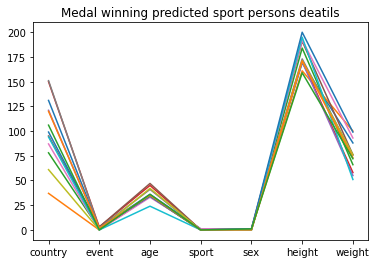

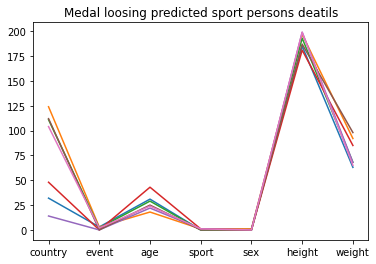

In [306]:
import random

A=[]
Y=[]
W=[]
count=int(input("please enter the how many :"))
for i in range(count):
  height=random.randint(150, 200)
  weight=random.randint(50, 100)
  sex=random.randint(0,1)
  sport=random.randint(0,1)
  age=random.randint(18,50)
  event=random.randint(0,3)
  country=random.randint(0,170)
  C=Classifier.predict(sc.transform([[country,event,age,sport,sex,height,weight]]))
  A.append(int(C))
  if(C==1):
    
    X=['country','event','age','sport','sex','height','weight']
    Y.append(country)
    Y.append(event)
    Y.append(age)
    Y.append(sport)
    Y.append(sex)
    Y.append(height)
    Y.append(weight)
  else:
    X=['country','event','age','sport','sex','height','weight']
    W.append(country)
    W.append(event)
    W.append(age)
    W.append(sport)
    W.append(sex)
    W.append(height)
    W.append(weight)
   
    

print(A)
m=A.count(1)
print("IN this sample get the medal probabity:")
print((m/len(A))*100)
print(Y)
n = 7
def divide_chunks(l, n):
      
    # looping till length l
    for i in range(0, len(l), n): 
        yield l[i:i + n]
  
# How many elements each
# list should have
n = 7
  
x1 = list(divide_chunks(Y, n))
x2 = list(divide_chunks(W, n))
print (x1)
print(len(x1))
X=['country','event','age','sport','sex','height','weight']
for no in range(len(x1)):
  plt.plot(X,x1[no])
plt.title("Medal winning predicted sport persons deatils")
plt.show()

for no1 in range(len(x2)):
  
  plt.plot(X,x2[no1])
plt.title("Medal loosing predicted sport persons deatils")
plt.show()